# Non-Linear Logistic Regression

In [1]:
%run Include-1-File-Paths.ipynb

Variables exposed in Include-1-File-Paths = 
{'data_dir_path': '..\\DataSets', 'image_dir_path': '..\\Images'}


In [2]:
%run Include-2-Shared-Functions.ipynb

C:\Users\JSubrama\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Loading BokehJS ...

In [3]:
%run Include-3-Shared-Viz-Functions.ipynb

C:\Users\JSubrama\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In the last session we looked at the basic concepts of logistic regression.

- Logistic classification is about predicting one or another category.
- Models give us numerical values.
- The way to convert numerical values to categorical values is by using the *sigmoid*.
- A new penalty function that has small values if you guess very close to correctly and very large values otherwise (roughly).

In [4]:
# Load the data into a dataframe
file_url = os.path.join(data_dir_path, "forged-bank-notes.csv")
#file_url
# header=0 drops the header row in the csv file
data = pd.read_csv(file_url, header=0, names=['A1', 'A2', 'A3', 'A4', 'Genuine'])

In [8]:
# Set up the inputs and 
# display the few rows of the input
inputs_a1_a2 = data[['A1', 'A2']]
inputs_a3_a4 = data[['A3', 'A4']]
inputs_a1_a3 = data[['A1', 'A3']]
inputs_a1_a4 = data[['A1', 'A4']]
inputs_a2_a3 = data[['A2', 'A3']]
inputs_a2_a4 = data[['A2', 'A4']]

Let's start where we left off last time.

We were looking at a bank notes dataset. The dataset has features A1, A2, A3, and A4.

We were looking just at A1 and A2 -- to keep things simple enough to visualize things easily.

We'll continue to look at A1 and A2...

In [9]:
# What the first few rows of the dataset looks like -- 
#  for just the A1 and A2 features.
inputs_a1_a2.head()

,A1,A2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [7]:
# And here's what the first few lines of the outputs/targets

# Set up the output and 
# display the first few rows of the output/target
output = data[['Genuine']]
output.head()

,Genuine
0,0
1,0
2,0
3,0
4,0


In [10]:
# Set up the training data
X_train_a1_a2 = {'data': inputs_v1_v2.values, 'feature1': 'A1', 'feature2': 'A2'}
X_train_a3_a4 = {'data': inputs_v3_v4.values, 'feature1': 'A3', 'feature2': 'A4'} 
X_train_a1_a3 = {'data': inputs_v1_v3.values, 'feature1': 'A1', 'feature2': 'A3'}
X_train_a1_a4 = {'data': inputs_v1_v4.values, 'feature1': 'A1', 'feature2': 'A4'}
X_train_a2_a3 = {'data': inputs_v2_v3.values, 'feature1': 'A2', 'feature2': 'A3'}
X_train_a2_a4 = {'data': inputs_v2_v4.values, 'feature1': 'A2', 'feature2': 'A4'}
X_train_a1_a2['data'].shape

(1372, 2)

In [11]:
# Set up the target data 
y = output.values

# Change the shape of y to suit scikit learn's array shape requirements
y_train = np.array(list(y.squeeze()))
y_train.shape

(1372,)

In [12]:
# Set up the positive and negative categories
# Scatter of A1 versus A2
positive = data[data['Genuine'].isin([1])]
negative = data[data['Genuine'].isin([0])]

In [13]:
# Set up the logistic regression model from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Solvers that seem to work well are 'liblinear' and 'newton-cg"
lr = LogisticRegression(C=100.0, random_state=0, solver='liblinear', verbose=2)

In [14]:
# Train the model and find the optimal parameter values
lr.fit(X_train_a1_a2['data'], y_train)

[LibLinear]

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

At this point, (just imagine that) we've:

- visualized the data
- defined the task we'd like to accomplish
- defined the model
- defined the penalty for the being wrong
- used an iterative algorithm (like gradient descent) to find the optimal values of the parameters

(Can you picture all of this from the dataset point of view?)

<img src="../Images/nonlinear-logistic-regression-1.png" alt="Table View 1" style="width:600px"/>

<img src="../Images/nonlinear-logistic-regression-2.png" alt="Table View 1" style="width:600px"/>

<img src="../Images/nonlinear-logistic-regression-3.png" alt="Table View 1" style="width:600px"/>

In [15]:
# These are the optimal values of w0, w1 and w2
w0 = lr.intercept_[0]
w1 = lr.coef_.squeeze()[0]
w2 = lr.coef_.squeeze()[1]
print("w0: {}\nw1: {}\nw2: {}".format(w0, w1, w2))

w0: 0.5865973329054543
w1: -1.1107052345243293
w2: -0.2725500308982399


In [49]:
# Function for plotting class boundaries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def poly_boundary_plot(XTrain, YTrain, degree, show_contours=0):
    
    # XTrain has to have exactly 2 features for this visualization to work
    
    # Transform the training inputs
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(XTrain['data'])
    # NOTE: the poly function adds a bias value of 1 to each row of input data -- 
    #  default setting is include_bias=True
    
    # Set up the logistic regression model from SciKit Learn
    # Solvers that seem to work well are 'liblinear' and 'newton-cg"
    lr = LogisticRegression(C=100.0, random_state=0, solver='liblinear', verbose=2)
    
    # Fit the polynomial data to the simple linear logistic regression model we have
    lr.fit(X_train_poly, YTrain);
    
    # Create a grid of feature values
    
    # Find the min and max values of the two features 
    # Make grid values
    GRID_INCREMENT = 0.02
    x1_min = np.array([XTrain['data'][i][0] for i in range(len(XTrain['data']))]).min()
    x1_max = np.array([XTrain['data'][i][0] for i in range(len(XTrain['data']))]).max()
    
    x2_min = np.array([XTrain['data'][i][1] for i in range(len(XTrain['data']))]).min()
    x2_max = np.array([XTrain['data'][i][1] for i in range(len(XTrain['data']))]).max()
    
    xx1, xx2 = np.mgrid[x1_min:x1_max:GRID_INCREMENT, x2_min:x2_max:GRID_INCREMENT]
    #xx1.shape, xx2.shape
    
    # Create the grid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid.shape
    
    # The predictions of the model
    preds_poly = lr.predict(poly.fit_transform(grid))
    preds_poly_probs = lr.predict_proba(poly.fit_transform(grid))
    preds_poly_probs_0 = np.array([preds_poly_probs[i][0] for i in range(len(preds_poly_probs))])
    preds_poly_probs_1 = np.array([preds_poly_probs[i][1] for i in range(len(preds_poly_probs))])
    
    #return preds_poly, preds_poly_probs, preds_poly_probs_0, preds_poly_probs_1
    
    # Where did the model misclassify banknotes?
    # Keep in mind we are only using V1 and V2
    ## CAUTION: USING EXISTING variable values here
    model_preds = lr.predict(X_train_poly)
    errors_poly = data[data['Genuine'] != model_preds]
    #errors_poly
    
    # Get some classification performance metrics
    accuracy = metrics.accuracy_score(YTrain, model_preds)
    report = metrics.classification_report(YTrain, model_preds)
    confusion_matrix = metrics.confusion_matrix(YTrain, model_preds, labels=None, sample_weight=None)
    
    # Plot the boundary
    fig, ax = plt.subplots(figsize=(15,10))

    ax.scatter(positive[XTrain['feature1']], positive[XTrain['feature2']], s=30, c='b', marker='+', label='Genuine')
    ax.scatter(negative[XTrain['feature1']], negative[XTrain['feature2']], s=30, c='r', marker='.', label='Forged')

    ax.set_xlabel(XTrain['feature1'])
    ax.set_ylabel(XTrain['feature2'])

    # Now plot black circles around data points that were incorrectly predicted
    ax.scatter(errors_poly[XTrain['feature1']], errors_poly[XTrain['feature2']], facecolors="none", edgecolors="m", s=80, label="Wrongly Classified")

    # Finally plot the line which represents the decision boundary
    #ax.plot(x1, x2, color="green", linestyle="--", marker=None, label="boundary")
    # And plot the contours that separate the 1s from the 0s
    plt.contour(xx1,xx2,preds_poly.reshape(xx1.shape), colors='g', linewidths=1)
    if show_contours == 1:
        # preds_poly_probs_0 for contours of probability of 0 -- i.e. prob(forged bank note)
        # preds_poly_probs_1 for contours of probability of 1 -- i.e. prob(genuine bank note)
        contour_probs = preds_poly_probs_1
        cs = plt.contour(xx1,xx2,contour_probs.reshape(xx1.shape), linewidths=0.7)
        plt.clabel(cs, inline=1, fontsize=12)

    ax.legend(loc='lower right')
    
    title = 'Logistic Regression\n'
    title = title + 'Bank Note Validation Based on Feature Values ' + XTrain['feature1'] + ' and ' + XTrain['feature2'] + '\n'
    title = title + 'Polynomial Degree: ' + str(degree) + '\n'
    title = title + 'Number of misclassified points = ' + str(len(errors_poly))

    plot = plt.title(title);
    
    return errors_poly, accuracy, confusion_matrix, report, plot

...and this is what we saw last time for linear logistic regression

[LibLinear]

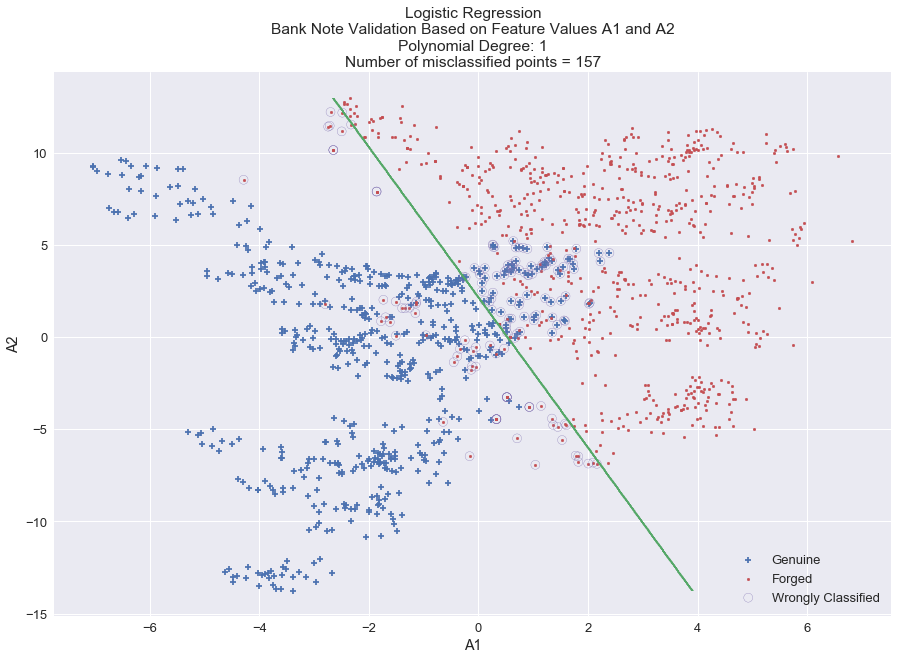

In [50]:
# logistic regression - what we saw last time
# NOTE: The contours are probabilities that the bank note is genuine
errors, accuracy, conf_matrix, report, plot = poly_boundary_plot(X_train_a1_a2, 
                    y_train, 
                    degree=1, 
                    show_contours=0)

In [51]:
# Which rows of the dataset are misclassfied?
print('Number of Misclassifications = {}'.format(len(errors)))
errors

Number of Misclassifications = 157


,A1,A2,A3,A4,Genuine
4,0.329240,-4.455200,4.57180,-0.988800,0
7,2.092200,-6.810000,8.46360,-0.602160,0
18,1.447900,-4.879400,8.34280,-2.108600,0
21,0.329200,-4.455200,4.57180,-0.988800,0
25,0.705700,-5.498100,8.33680,-2.871500,0
26,1.143200,-3.741300,5.57770,-0.635780,0
30,-0.248110,-0.177970,4.90680,0.154290,0
34,-1.616200,0.809080,8.16280,0.608170,0
86,-1.131300,1.903700,7.53390,1.022000,0
95,-0.644720,-4.606200,8.34700,-2.709900,0


In [20]:
# Classification accuracy
accuracy

0.8855685131195336

In [21]:
# Confusion Matrix
print(conf_matrix)

[[693  69]
 [ 88 522]]


In [22]:
# True negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp

(693, 69, 88, 522)

In [23]:
# Precision, recall, f1-score
print(report)

             precision    recall  f1-score   support

          0       0.89      0.91      0.90       762
          1       0.88      0.86      0.87       610

avg / total       0.89      0.89      0.89      1372



## Non-Linear Logistic Regression

[LibLinear]

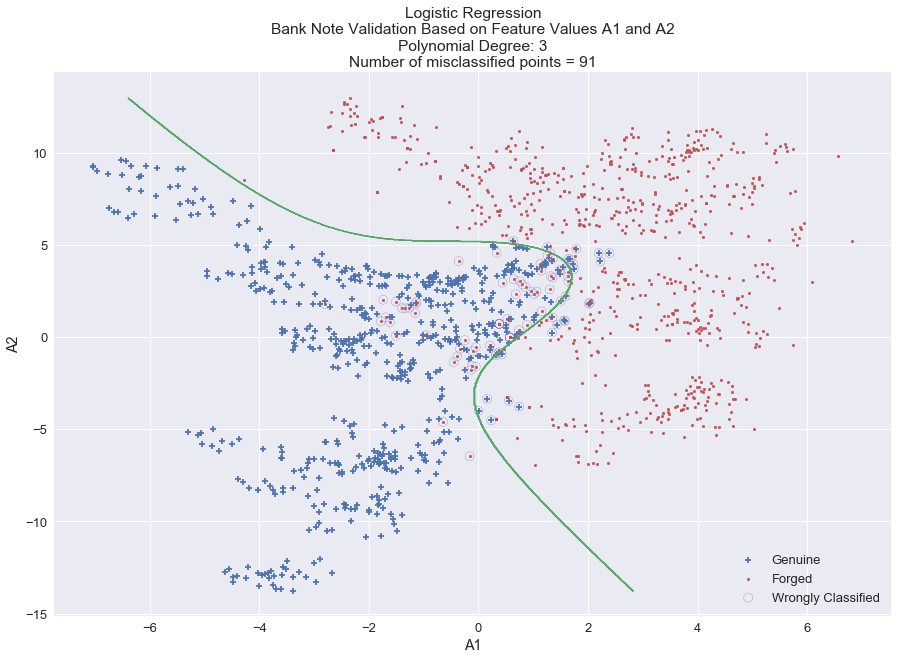

In [52]:
# logistic regression
# NOTE: The contours are probabilities that the bank note is genuine
errors, accuracy, conf_matrix, report, plot = poly_boundary_plot(X_train_a1_a2, 
                                                y_train, 
                                                degree=3, 
                                                show_contours=0)

In [53]:
# Which rows of the dataset are misclassfied?
print('Number of Misclassifications = {}'.format(len(errors)))
errors

Number of Misclassifications = 91


,A1,A2,A3,A4,Genuine
17,0.803550,2.847300,4.34390,0.601700,0
30,-0.248110,-0.177970,4.90680,0.154290,0
31,1.488400,3.627400,3.30800,0.489210,0
34,-1.616200,0.809080,8.16280,0.608170,0
49,1.634900,3.286000,2.87530,0.087054,0
79,1.131700,3.964700,3.39790,0.843510,0
86,-1.131300,1.903700,7.53390,1.022000,0
95,-0.644720,-4.606200,8.34700,-2.709900,0
123,-1.507500,1.922400,7.14660,0.891360,0
159,1.356600,4.235800,2.13410,0.321100,0


In [26]:
# Classification accuracy
accuracy

0.9285714285714286

In [27]:
# Confusion Matrix
print(conf_matrix)

[[696  66]
 [ 32 578]]


In [28]:
# True negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp

(696, 66, 32, 578)

In [29]:
# Precision, recall, f1-score
print(report)

             precision    recall  f1-score   support

          0       0.96      0.91      0.93       762
          1       0.90      0.95      0.92       610

avg / total       0.93      0.93      0.93      1372



At some point, just making the model more and more complex will start to produce diminishing returns. At this point it's more data that will help.

We've been working with just 2 of the 4 features -- why not work with all the features available to us? This gives us more predictive power but makes it hard to visualize the boundaries.

We can, however, see how our predictions are going by looking at the rows in the dataset that are misclassified.

## Use all 4 features instead of just A1 and A2

In [37]:
# Set up the inputs
inputs_all = data[['A1', 'A2', 'A3', 'A4']]

In [38]:
# Here are some key stats on the inputs
inputs_all.describe()

,A1,A2,A3,A4
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [39]:
# Turn the inputs into an array of training data
X_all_train = inputs_all.values
X_all_train.shape

(1372, 4)

In [40]:
# Sanity check
X_all_train[0:3]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645]])

In [41]:
# The output remains the same
y_train.shape

(1372,)

In [42]:
# Use the same logistic regression model as before
# Train the model and find the optimal parameter values
lr.fit(X_all_train, y_train)

[LibLinear]

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [43]:
# These are the optimal values of w0, w1, w2, w3, and w4
w0 = lr.intercept_[0]
w1 = lr.coef_.squeeze()[0]
w2 = lr.coef_.squeeze()[1]
w3 = lr.coef_.squeeze()[2]
w4 = lr.coef_.squeeze()[3]
print("w0: {}\nw1: {}\nw2: {}\nw3: {}\nw4: {}".format(w0, w1, w2, w3, w4))

w0: 6.797709306557308
w1: -7.264170431819903
w2: -3.885217128657095
w3: -4.890280989043379
w4: -0.5436532238007578


In [44]:
# Genuine or fake for the entire data set
y_all_pred = lr.predict(X_all_train)
print(y_all_pred)

[0 0 0 ... 1 1 1]


In [45]:
lr.score(X_all_train, y_train)

0.9919825072886297

In [46]:
# The probabilities of [Genuine = 0, Genuine = 1]
y_all_pred_probs = lr.predict_proba(X_all_train)
print(y_all_pred_probs)

[[1.00000000e+00 9.37582493e-18]
 [1.00000000e+00 2.49232658e-20]
 [9.99999999e-01 1.24646312e-09]
 ...
 [1.41340716e-01 8.58659284e-01]
 [4.74684318e-03 9.95253157e-01]
 [7.96637064e-07 9.99999203e-01]]


In [36]:
# Where did the model misclassify banknotes?
errors = data[data['Genuine'] != y_all_pred]
print('Number of Misclassifications = {}'.format(len(errors)))
errors

Number of Misclassifications = 11


,V1,V2,V3,V4,Genuine
145,0.51950,-3.2633,3.0895,-0.984900,0
320,0.51950,-3.2633,3.0895,-0.984900,0
351,0.51950,-3.2633,3.0895,-0.984900,0
671,0.51947,-3.2633,3.0895,-0.984920,0
716,0.51950,-3.2633,3.0895,-0.984900,0
911,2.03100,1.8520,-3.0121,0.003003,1
918,2.39170,4.5565,-4.9888,-2.898700,1
942,-3.37930,-13.7731,17.9274,-2.032300,1
1094,2.01770,1.7982,-2.9581,0.209900,1
1101,2.19430,4.5503,-4.9760,-2.725400,1


Lesson: With enough data, a linear model is often good enough.

## Summary

We now have in our toolkit ways to make numerical and categorical predictions.

Can you think of a prediction that doesn't predict a numerical value or a category?

Moreover, our dataset can contain any number of features and our features can be complex.

We know how to take linear models and make them into non-linear models to capture more complex patterns in our data.

We can even bandy about fancy terms like logistic regression, penalty functions, gradient descent, support vector machines, and neural networks!